In [1]:
import os
import cv2
import numpy as np
from utils.preprocess_helpers import center_crop_image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train_ims = 'data/training/Labeled-Samples/org-images/'
train_mas = 'data/training/Labeled-Samples/masks/'

train_unlabeled = 'data/train/train-set/Unlabeled-Samples/org-images/'

#### Training Set
- 900 labeled samples
- 2695 unlabeled samples

After center cropping larger ims and mas:
- Shape of one image: (3000,4000,3)
- Shape of one mask: (3000,4000)

#### Validation Set

### Class Distribution

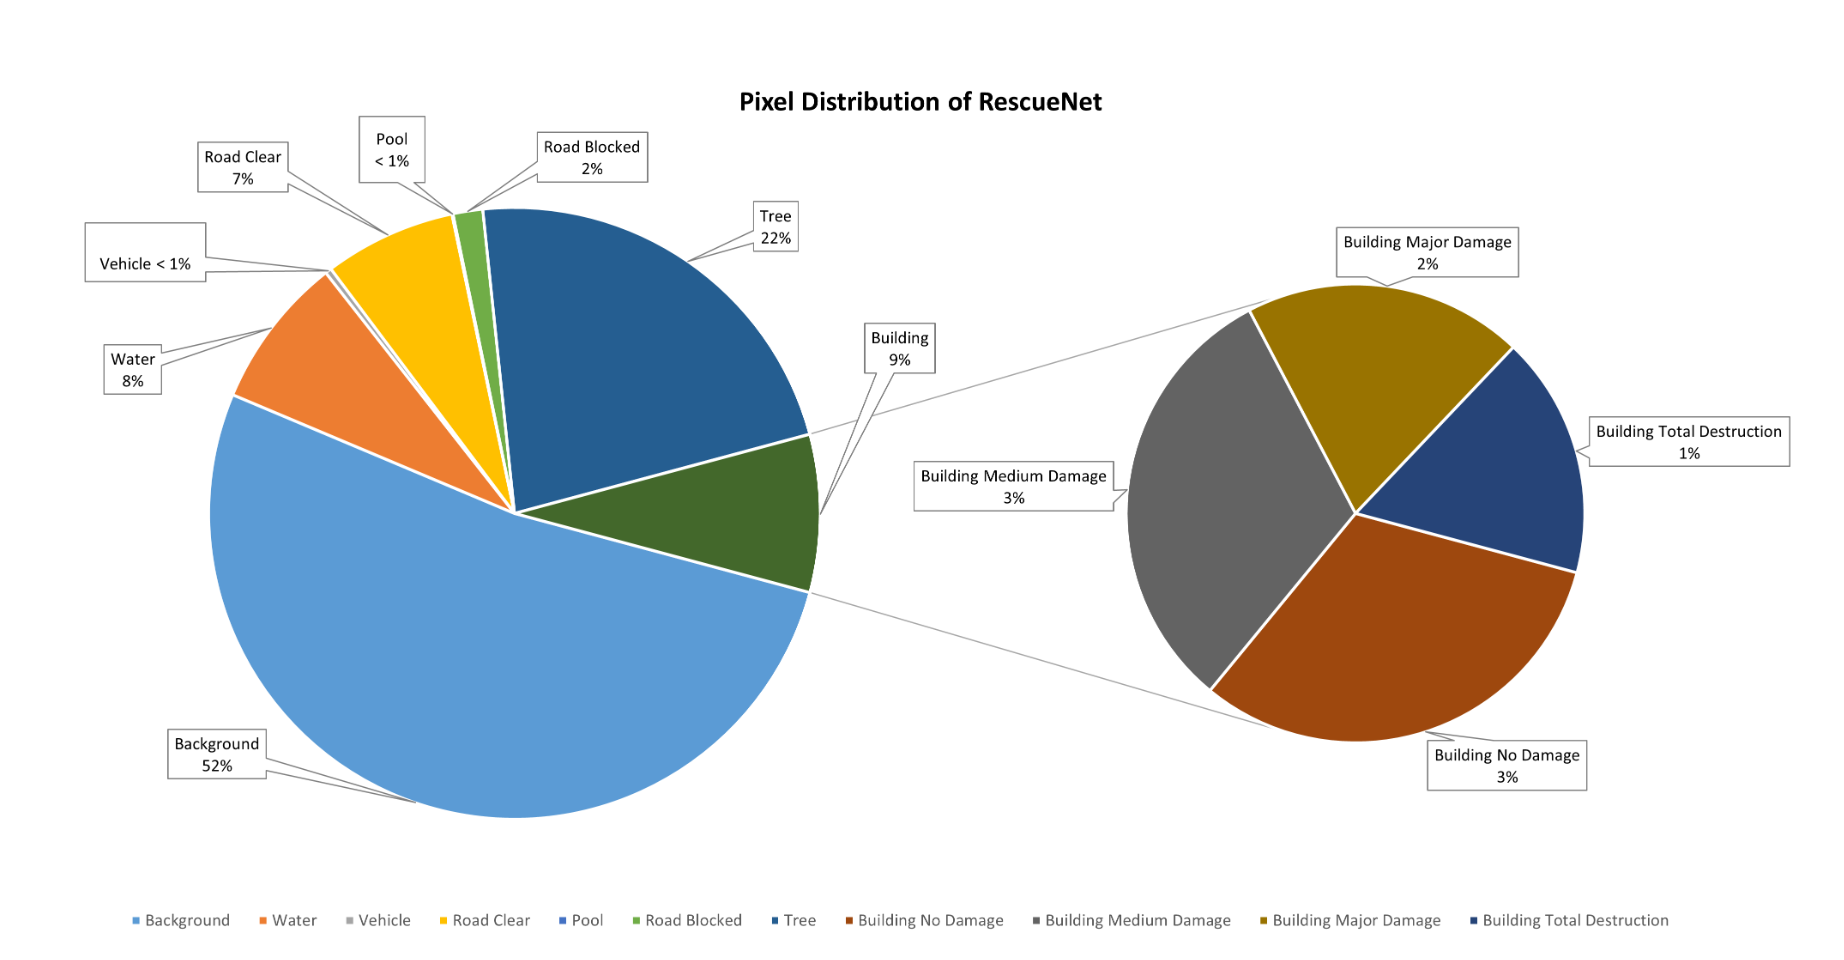

In [3]:
### read in images and crop center

im_files = os.listdir(train_ims)
im_files = [file for file in im_files if file.endswith(('png', 'jpg', 'jpeg'))]
ims = []    

for f in im_files:
    im = cv2.imread(os.path.join(train_ims, f))
    ims.append(im)

corr_ims = []

for m in ims:
    cropped = m
    if not m.shape == (3000,4000):
        cropped = center_crop_image(m)
        
    corr_ims.append(cropped)

In [7]:
imgs = np.stack(corr_ims[:300])
print(imgs.shape)
np.save('data/training/imgs1.npy', imgs)

(300, 3000, 4000, 3)


In [3]:
def resize(imgs, im_size):

    images = []

    for i in range(imgs.shape[0]):
        image = cv2.resize(imgs[i], (im_size, im_size), interpolation=cv2.INTER_LINEAR)

        images.append(image)
    
    images = np.array(images)

    return images

In [7]:
im1 = np.load('data/training/imgs1.npy')
print(im1.shape)

(300, 3000, 4000, 3)


In [10]:
im_resh = resize(im1, 713)
print(im_resh.shape)
np.save('data/training/imgs1_resh.npy', im_resh)

(300, 713, 713, 3)


In [11]:
im2 = np.load('data/training/imgs2.npy')
print(im2.shape)

(300, 3000, 4000, 3)


In [12]:
im2_resh = resize(im2, 713)
print(im2_resh.shape)
np.save('data/training/imgs2_resh.npy', im2_resh)

(300, 713, 713, 3)


In [8]:
imgs = np.stack(corr_ims[300:600])
print(imgs.shape)
np.save('data/training/imgs2.npy', imgs)

(300, 3000, 4000, 3)


KeyboardInterrupt: 

In [4]:
imgs = np.stack(corr_ims[600:900])
print(imgs.shape)
np.save('data/training/imgs3.npy', imgs)

(300, 3000, 4000, 3)


In [8]:
im3_resh = resize(imgs, 713)
print(im3_resh.shape)
np.save('data/training/imgs3_resh.npy', im3_resh)

(300, 713, 713, 3)


In [5]:
imgs = np.stack(corr_ims)
print(imgs.shape)
np.save('data/training/imgs.npy', imgs)

MemoryError: Unable to allocate 30.2 GiB for an array with shape (900, 3000, 4000, 3) and data type uint8

In [3]:
### read in masks and crop center

mask_files = os.listdir(train_mas)
mask_files = [file for file in mask_files if file.endswith(('png', 'jpg', 'jpeg'))]
masks = []    

for f in mask_files:
    mas = cv2.imread(os.path.join(train_mas, f), 0)
    masks.append(mas)

corr_masks = []

for m in masks:
    cropped = m
    if not m.shape == (3000,4000):
        cropped = center_crop_image(m)
        
    corr_masks.append(cropped)
    

In [4]:
masks = np.stack(corr_masks)
print(masks.shape)
np.save('data/train/train-set/numpy/train_masks.npy', masks)

(900, 3000, 4000)


In [4]:
masks = np.load('data/training/masks.npy')

In [5]:
masks = resize(masks, 713)
np.save('data/training/masks_resh.npy', masks)

In [6]:
print(np.unique(masks))

[ 0  1  2  3  4  5  6  7  8  9 10]


In [7]:
ims1 = np.load('data/training/imgs1_resh.npy')
ims2 = np.load('data/training/imgs2_resh.npy')
ims3 = np.load('data/training/imgs3_resh.npy')

In [8]:
ims_resh = np.concatenate((ims1, ims2, ims3), axis=0)

In [10]:
print(ims_resh.shape)
np.save('data/training/imgs_resh.npy', ims_resh)

(900, 713, 713, 3)


In [11]:
# train test split
X = np.load('data/training/imgs_resh.npy')
y = np.load('data/training/masks_resh.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)

np.save('data/training/train_imgs.npy', X_train)
np.save('data/training/train_masks.npy', y_train)
np.save('data/training/test_imgs.npy', X_test)
np.save('data/training/test_masks.npy', y_test)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(np.unique(y_train))
print(np.unique(y_test))

(765, 713, 713, 3)
(765, 713, 713)
(135, 713, 713, 3)
(135, 713, 713)
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]


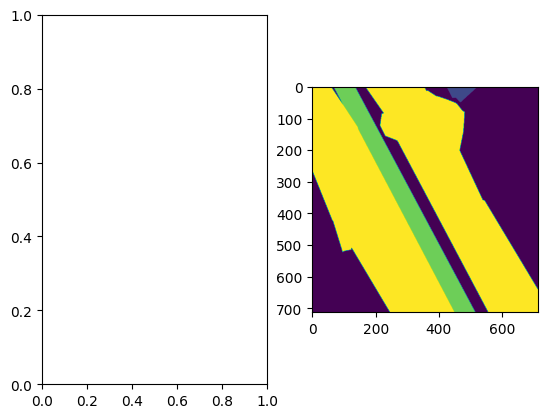

In [18]:
fig, ax = plt.subplots(1,2)

ax[0] = plt.imshow(X_train[5])
ax[1] = plt.imshow(y_test[100])

plt.show()

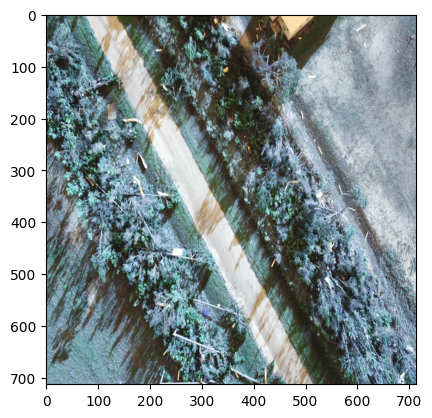

In [19]:
plt.imshow(X_test[100])

### Further Preprocessing
- train / test split
- resize / crop to square
- normalization? (consider ImageNet pretraining)
- augmentation